In [592]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.family'] = "serif"

In [593]:
data = pd.read_csv('winequality-white.csv',sep=';')

In [594]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [595]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [596]:
data.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,20,20,20,20,20,20,20,20,20,20,20
4,163,163,163,163,163,163,163,163,163,163,163
5,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457
6,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198
7,880,880,880,880,880,880,880,880,880,880,880
8,175,175,175,175,175,175,175,175,175,175,175
9,5,5,5,5,5,5,5,5,5,5,5


In [597]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [598]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


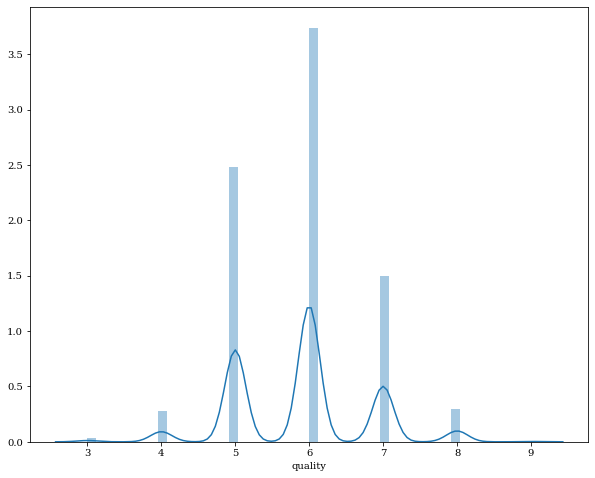

In [599]:
sns.distplot(data['quality'])

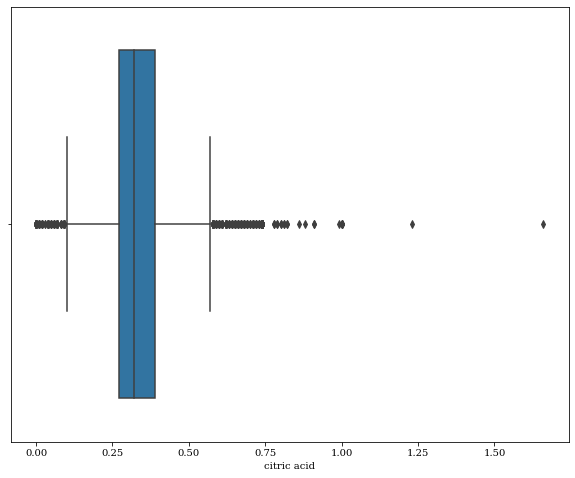

In [600]:
sns.boxplot(data['citric acid'])

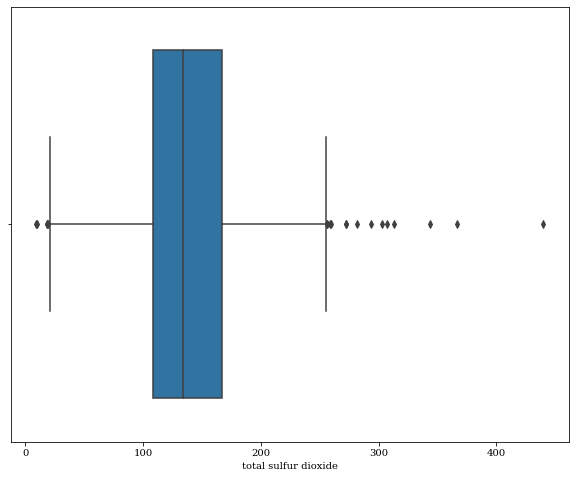

In [601]:
sns.boxplot(data['total sulfur dioxide'])

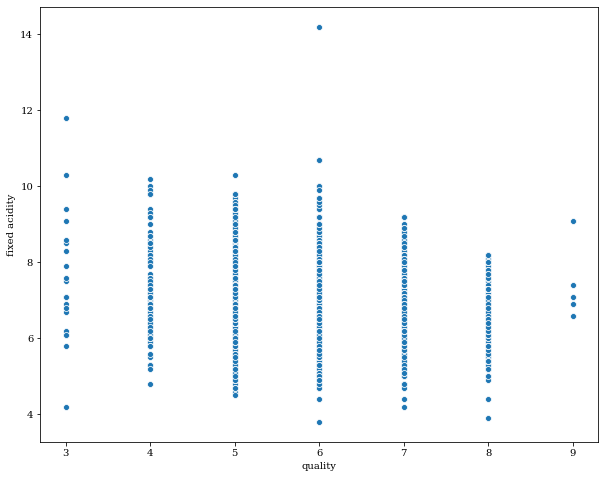

In [602]:
sns.scatterplot(x=data['quality'],y=data['fixed acidity'])

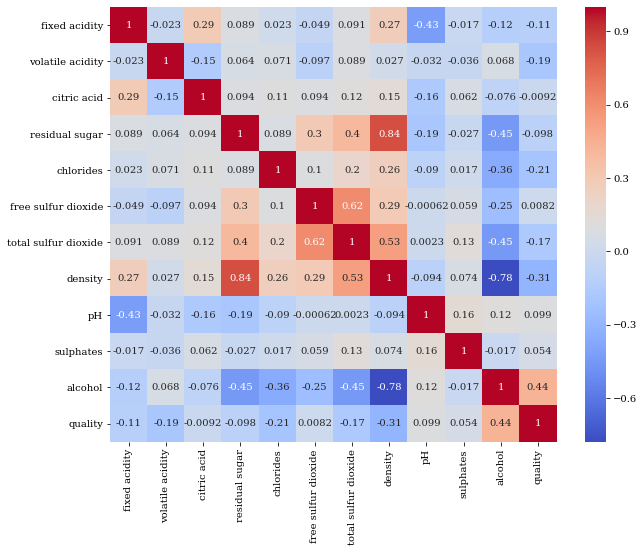

In [603]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

## kNN - k Nearest Neighbour

#### k Nearest Neighbour - (wine quality - [3,4,5,6,7,8,9])

In [604]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score

In [605]:
X = data.drop(columns=['quality'])
y = data['quality'].values

In [606]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [607]:
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 10): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, y_train) 
  
    training_score = clf.score(X_train, y_train) 
    test_score = clf.score(X_test, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [608]:
for keys, values in scores.items(): 
    print(keys, ':', values) 

2 : [0.822928821470245, 0.5700680272108843]
3 : [0.7777129521586931, 0.5380952380952381]
4 : [0.7298716452742123, 0.5408163265306123]
5 : [0.7129521586931156, 0.54421768707483]
6 : [0.6782380396732789, 0.5510204081632653]
7 : [0.6642357059509918, 0.5387755102040817]
8 : [0.646732788798133, 0.5380952380952381]
9 : [0.6411901983663943, 0.5414965986394558]


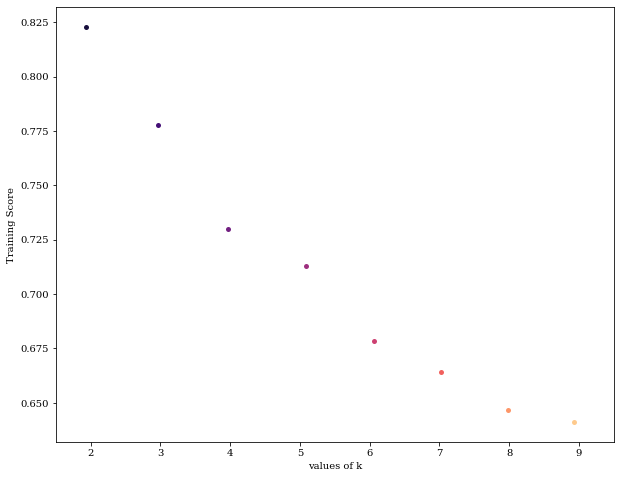

In [609]:
ax = sns.stripplot(K, training,palette='magma')
ax.set(xlabel ='values of k', ylabel ='Training Score')   
  
plt.show() 

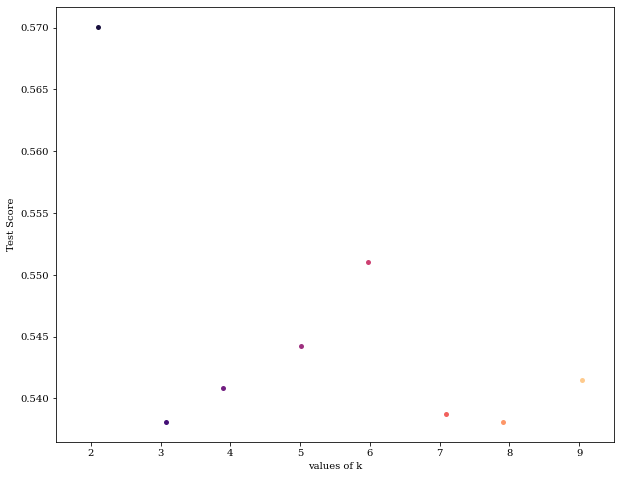

In [610]:
ax = sns.stripplot(K, test,palette='magma')
ax.set(xlabel ='values of k', ylabel ='Test Score') 
plt.show() 

In [611]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [612]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.34      0.38      0.36        60
           5       0.54      0.71      0.61       458
           6       0.60      0.59      0.60       630
           7       0.68      0.40      0.50       267
           8       0.71      0.22      0.33        46

    accuracy                           0.57      1470
   macro avg       0.48      0.38      0.40      1470
weighted avg       0.58      0.57      0.56      1470



#### k Nearest Neighbour - (wine quality - [0,1,2])

In [613]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [614]:
quality_category=[]

In [615]:
for num in data['quality']:
    if num<5:
        quality_category.append(0)
    elif (num >=5 or num <=7):
        quality_category.append(1)
    elif num >7:
        quality_category.append(2)

In [616]:
data['quality_category'] = quality_category

In [617]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [618]:
X_managed = data.drop(columns=['quality','quality_category'])
y_managed = data['quality_category'].values

In [619]:
X_train_managed,X_test_managed,y_train_managed,y_test_managed=train_test_split(X_managed,y_managed,test_size=0.3,random_state=0)
sc_X = StandardScaler()
X_train_managed = sc_X.fit_transform(X_train_managed)
X_test_managed = sc_X.transform(X_test_managed)

In [620]:
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 20): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train_managed, y_train_managed) 
  
    training_score = clf.score(X_train_managed, y_train_managed) 
    test_score = clf.score(X_test_managed, y_test_managed) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [621]:
for keys, values in scores.items(): 
    print(keys, ':', values) 

2 : [0.9842473745624271, 0.9408163265306122]
3 : [0.9743290548424738, 0.9510204081632653]
4 : [0.9699533255542591, 0.9469387755102041]
5 : [0.9702450408401401, 0.9530612244897959]
6 : [0.969661610268378, 0.9537414965986395]
7 : [0.9667444574095683, 0.9537414965986395]
8 : [0.9664527421236873, 0.954421768707483]
9 : [0.9664527421236873, 0.9530612244897959]
10 : [0.9664527421236873, 0.9537414965986395]
11 : [0.9667444574095683, 0.9530612244897959]
12 : [0.9670361726954493, 0.9530612244897959]
13 : [0.9667444574095683, 0.9530612244897959]
14 : [0.9667444574095683, 0.9537414965986395]
15 : [0.9667444574095683, 0.9530612244897959]
16 : [0.9667444574095683, 0.9530612244897959]
17 : [0.9667444574095683, 0.9530612244897959]
18 : [0.9667444574095683, 0.9530612244897959]
19 : [0.9667444574095683, 0.9530612244897959]


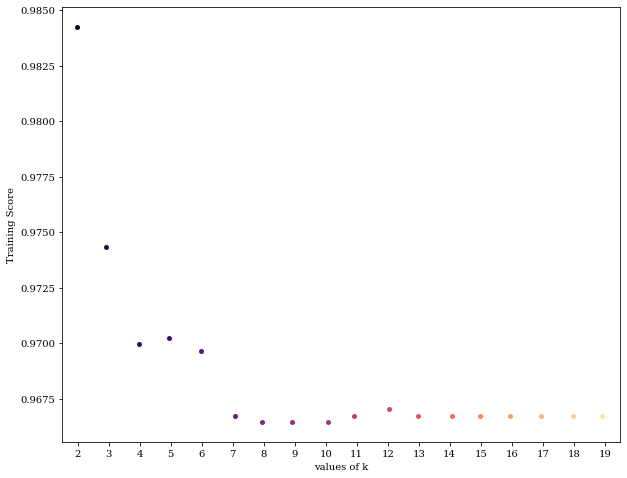

In [622]:
ax = sns.stripplot(K, training,palette='magma')
ax.set(xlabel ='values of k', ylabel ='Training Score')   
  
plt.show() 

In [623]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_managed,y_train_managed)
y_pred_managed = knn.predict(X_test_managed)

In [624]:
print(classification_report(y_test_managed, y_pred_managed))

              precision    recall  f1-score   support

           0       0.38      0.39      0.38        69
           1       0.97      0.97      0.97      1401

    accuracy                           0.94      1470
   macro avg       0.67      0.68      0.68      1470
weighted avg       0.94      0.94      0.94      1470

